# Tree Based Methods

#### Description:

This codebook covers how to use various tree based machine learning methods to make a prediction.

#### Skill level:

- Intermediate

### Import the required libraries
-------------------------

In [ ]:
import os
import sys

platform_path = os.path.abspath(os.path.join(os.path.abspath(''), '../../../'))
sys.path.append(platform_path)

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error, mean_squared_error, median_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

### Read data into a Pandas dataframe
-------------------------

In [3]:
df_raw = pd.read_csv(os.path.join(platform_path, 'DATA/boston.txt'))

### Check the shape and head of the dataframe
-------------------------

In [4]:
df_raw.shape

(506, 14)

In [5]:
df_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MDEV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Separate features from the label
-------------------------

In [6]:
X_all = df_raw.drop('MDEV', axis=1)

In [7]:
y_true_all = df_raw[['MDEV']].values

### Make a split between training and test sets of data
-------------------------

In [8]:
def shuffle_split_data(y_true_all, X_all, test_size):
    X_train, X_test, y_true_train, y_true_test = train_test_split(X_all, y_true_all, test_size=test_size)

    return X_train, y_true_train, X_test, y_true_test

In [9]:
X_train, y_true_train, X_test, y_true_test = shuffle_split_data(y_true_all, X_all, test_size=0.3)

### Fit a decision tree regressor using the training set of data
-------------------------

In [10]:
clf = DecisionTreeRegressor()

clf.fit(X_train, y_true_train)

DecisionTreeRegressor()

### Check predictions against actuals for training and test sets of data
-------------------------

In [11]:
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

In [12]:
df_pred_train = pd.DataFrame(y_true_train, columns=['MDEV'])

df_pred_train['MDEV_pred'] = y_pred_train

In [13]:
df_pred_train.head()

,MDEV,MDEV_pred
0,24.2,24.2
1,5.0,5.0
2,23.7,23.7
3,24.0,24.0
4,23.1,23.1


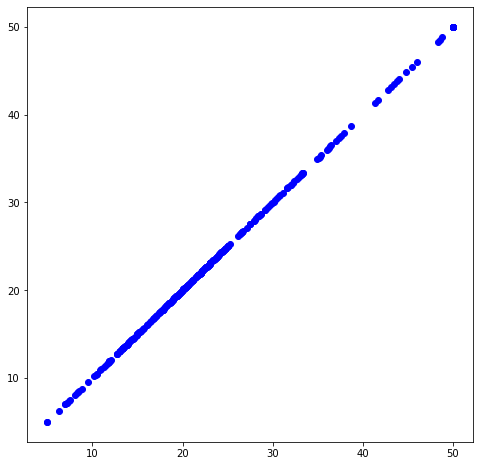

In [14]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=y_pred_train, y=y_true_train, color='b')

plt.show()

In [15]:
df_pred_test = pd.DataFrame(y_true_test, columns=['MDEV'])

df_pred_test['MDEV_pred'] = y_pred_test

In [16]:
df_pred_test.head()

,MDEV,MDEV_pred
0,31.5,26.2
1,50.0,50.0
2,29.0,32.9
3,14.5,18.2
4,28.7,22.9


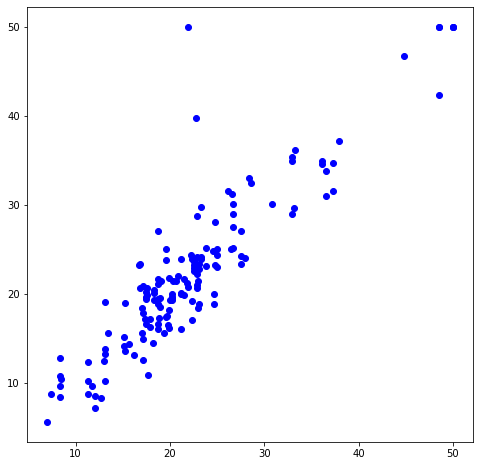

In [17]:
fig, ax = plt.subplots(figsize=(8,8))

ax.scatter(x=y_pred_test, y=y_true_test, color='b')

plt.show()

### Check common error metrics for training and test sets of data
-------------------------

In [18]:
def get_regression_metrics(y_true, y_pred):
    print('mean_squared_error', mean_squared_error(y_true, y_pred))
    print('explained_variance_score', explained_variance_score(y_true, y_pred))
    print('mean_absolute_error', mean_absolute_error(y_true, y_pred))
    print('mean_squared_error', mean_squared_error(y_true, y_pred))
    print('median_absolute_error', median_absolute_error(y_true, y_pred))
    print('r2_score', r2_score(y_true, y_pred))

In [19]:
get_regression_metrics(y_true_train, y_pred_train)

mean_squared_error 0.0
explained_variance_score 1.0
mean_absolute_error 0.0
mean_squared_error 0.0
median_absolute_error 0.0
r2_score 1.0


In [20]:
get_regression_metrics(y_true_test, y_pred_test)

mean_squared_error 15.402500000000002
explained_variance_score 0.8151319478135284
mean_absolute_error 2.552631578947368
mean_squared_error 15.402500000000002
median_absolute_error 1.8999999999999995
r2_score 0.814637814446618


### Inspect part of the tree for fitted model
-------------------------

[Text(143.84972199005733, 212.71304347826086, 'X[12] <= 7.535\nmse = 84.974\nsamples = 354\nvalue = 22.6'),
 Text(67.58651441472733, 203.2591304347826, 'X[5] <= 7.437\nmse = 79.504\nsamples = 102\nvalue = 32.317'),
 Text(44.87354984369573, 193.80521739130435, 'X[7] <= 1.485\nmse = 39.641\nsamples = 80\nvalue = 29.027'),
 Text(43.94322681486628, 184.3513043478261, 'mse = 0.0\nsamples = 3\nvalue = 50.0'),
 Text(45.80387287252518, 184.3513043478261, 'X[5] <= 6.733\nmse = 23.381\nsamples = 77\nvalue = 28.21'),
 Text(25.002431399791597, 174.89739130434782, 'X[5] <= 6.531\nmse = 6.455\nsamples = 39\nvalue = 24.915'),
 Text(13.373393539423411, 165.44347826086957, 'X[2] <= 5.415\nmse = 3.476\nsamples = 25\nvalue = 23.804'),
 Text(9.070649531087184, 155.98956521739132, 'X[10] <= 19.95\nmse = 1.717\nsamples = 13\nvalue = 22.815'),
 Text(5.116776658562001, 146.53565217391304, 'X[11] <= 394.245\nmse = 1.011\nsamples = 10\nvalue = 23.31'),
 Text(2.790969086488364, 137.08173913043478, 'X[7] <= 8.878

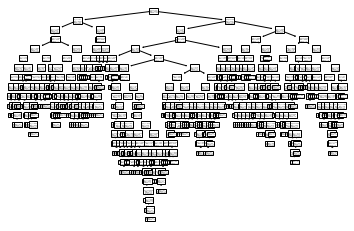

In [21]:
plot_tree(clf)[:10]

### Fit a random forest regressor using the training set of data
-------------------------

In [22]:
clf = RandomForestRegressor()

clf.fit(X_train, y_true_train)

<ipython-input-22-390f9a4a6ff2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_true_train)


RandomForestRegressor()

In [23]:
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

In [24]:
get_regression_metrics(y_true_train, y_pred_train)

mean_squared_error 1.9615621723163814
explained_variance_score 0.9769296397426112
mean_absolute_error 0.8820988700564958
mean_squared_error 1.9615621723163814
median_absolute_error 0.5824999999999889
r2_score 0.9769156094918191


In [25]:
get_regression_metrics(y_true_test, y_pred_test)

mean_squared_error 8.02522132236841
explained_variance_score 0.9036290166281891
mean_absolute_error 2.0523092105263143
mean_squared_error 8.02522132236841
median_absolute_error 1.4320000000000022
r2_score 0.9034200575319714


### Fit an extra trees regressor using the training set of data
-------------------------

In [26]:
clf = ExtraTreesRegressor()

clf.fit(X_train, y_true_train)

<ipython-input-26-b296cd7a659b>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_true_train)


ExtraTreesRegressor()

In [27]:
y_pred_train = clf.predict(X_train.values)
y_pred_test = clf.predict(X_test.values)

In [28]:
get_regression_metrics(y_true_train, y_pred_train)

mean_squared_error 5.6497175141782465e-09
explained_variance_score 0.9999999999335121
mean_absolute_error 5.649717538468291e-06
mean_squared_error 5.6497175141782465e-09
median_absolute_error 2.4868995751603507e-14
r2_score 0.9999999999335121


In [29]:
get_regression_metrics(y_true_test, y_pred_test)

mean_squared_error 7.913024809210517
explained_variance_score 0.9053161192477829
mean_absolute_error 2.0027960526315773
mean_squared_error 7.913024809210517
median_absolute_error 1.3285000000000036
r2_score 0.90477029229194
